# ctdproc: test fleat data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
import ctdproc as ctd

plt.ion()

%reload_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

xr.set_options(display_style="text");

Path to example CTD file in .hex format. The corresponding xmlcon file needs to be in the same directory.

In [22]:
hexfile = Path('/Users/gunnar/Projects/fleat/data/raw/RR1607/ctd/fleat16_ctd_cast_130.hex')

Convert hex file

In [23]:
c = ctd.io.CTD(hexfile)

Display parameters as read from xmlcon file. The parameters come in a `pandas.DataFrame`.

In [24]:
c.cfgp.transpose()

,@index,@SensorID,cal
TemperatureSensor1,0,55,"{'@SensorID': '55', 'SerialNumber': '5844', 'C..."
ConductivitySensor1,1,3,"{'@SensorID': '3', 'SerialNumber': '2819', 'Ca..."
PressureSensor,2,45,"{'@SensorID': '45', 'SerialNumber': '0831', 'C..."
TemperatureSensor2,3,55,"{'@SensorID': '55', 'SerialNumber': '2380', 'C..."
ConductivitySensor2,4,3,"{'@SensorID': '3', 'SerialNumber': '3215', 'Ca..."
WET_LabsCStar,5,71,"{'@SensorID': '71', 'SerialNumber': 'CST-492DR..."
FluoroWetlabWetstarSensor,6,21,"{'@SensorID': '21', 'SerialNumber': 'FLRTD-205..."
OxygenSensor,7,38,"{'@SensorID': '38', 'SerialNumber': '1138', 'C..."
AltimeterSensor,11,0,"{'@SensorID': '0', 'SerialNumber': 'P916-1184'..."


In [25]:
c.cfgp.PressureSensor.cal

Munch({'@SensorID': '45', 'SerialNumber': '0831', 'CalibrationDate': '17-NOV-2015', 'C1': -43456.38, 'C2': -0.2285116, 'C3': 0.009849962, 'D1': 0.03362284, 'D2': 0.0, 'T1': 30.04593, 'T2': -0.000440614, 'T3': 3.956775e-06, 'T4': 4.712297e-09, 'Slope': 1.0, 'Offset': 0.0, 'T5': 0.0, 'AD590M': 0.0128916, 'AD590B': -8.23481})

Convert the data to an `xarray.Dataset`.

In [26]:
cx = c.to_xarray()

Display the Dataset.

In [27]:
cx

<xarray.Dataset>
Dimensions:   (time: 25768)
Coordinates:
  * time      (time) datetime64[ns] 2016-06-21T16:45:36.999997 ... 2016-06-21T17:03:30.000001
Data variables:
    lon       (time) float64 134.7 134.7 134.7 134.7 ... 134.7 134.7 134.7 134.7
    lat       (time) float64 8.11 8.11 8.11 8.11 ... 8.106 8.106 8.106 8.106
    p         (time) float64 318.3 318.3 318.3 318.3 ... 319.7 319.7 319.7 319.7
    t1        (time) float64 8.917 8.916 8.917 8.916 ... 8.861 8.861 8.861 8.861
    t2        (time) float64 8.916 8.916 8.916 8.916 ... 8.86 8.86 8.86 8.86
    c1        (time) float64 3.671 3.671 3.671 3.671 ... 3.666 3.666 3.666 3.666
    c2        (time) float64 3.671 3.671 3.671 3.671 ... 3.667 3.667 3.667 3.667
    alt       (time) float64 73.92 73.94 73.92 73.92 ... 73.94 73.92 73.94 73.92
    trans     (time) float64 101.1 101.1 101.1 101.1 ... 101.1 101.1 101.1 101.1
    modcount  (time) int64 177 178 179 180 181 182 183 ... 82 83 84 85 86 87 88

Plot time series from temperature sensor 1

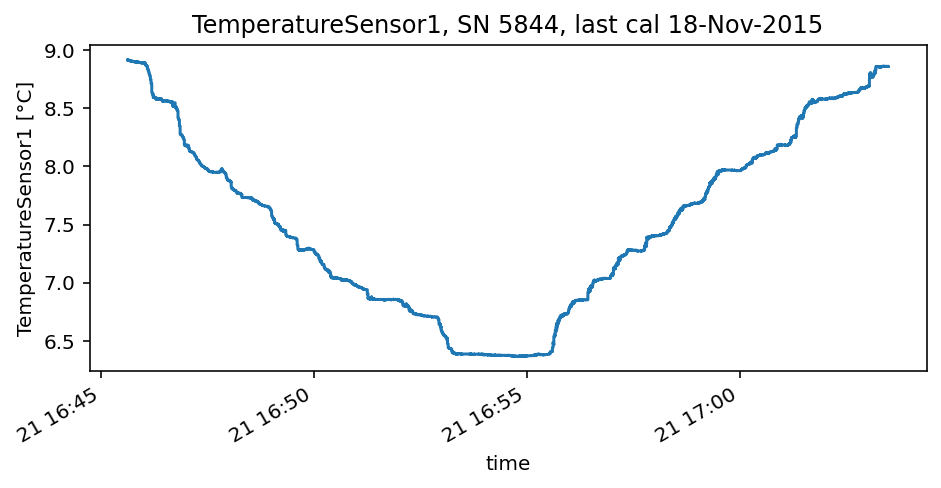

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 3))
cx.t1.plot(ax=ax)
ax.set(
    title="{}, SN {}, last cal {}".format(
        cx.t1.attrs["long_name"], cx.t1.attrs["SN"], cx.t1.attrs["CalDate"]
    )
);

Plot more time series. Adjust automatic axis labels to fit everything.

In [29]:
cx

<xarray.Dataset>
Dimensions:   (time: 25768)
Coordinates:
  * time      (time) datetime64[ns] 2016-06-21T16:45:36.999997 ... 2016-06-21T17:03:30.000001
Data variables:
    lon       (time) float64 134.7 134.7 134.7 134.7 ... 134.7 134.7 134.7 134.7
    lat       (time) float64 8.11 8.11 8.11 8.11 ... 8.106 8.106 8.106 8.106
    p         (time) float64 318.3 318.3 318.3 318.3 ... 319.7 319.7 319.7 319.7
    t1        (time) float64 8.917 8.916 8.917 8.916 ... 8.861 8.861 8.861 8.861
    t2        (time) float64 8.916 8.916 8.916 8.916 ... 8.86 8.86 8.86 8.86
    c1        (time) float64 3.671 3.671 3.671 3.671 ... 3.666 3.666 3.666 3.666
    c2        (time) float64 3.671 3.671 3.671 3.671 ... 3.667 3.667 3.667 3.667
    alt       (time) float64 73.92 73.94 73.92 73.92 ... 73.94 73.92 73.94 73.92
    trans     (time) float64 101.1 101.1 101.1 101.1 ... 101.1 101.1 101.1 101.1
    modcount  (time) int64 177 178 179 180 181 182 183 ... 82 83 84 85 86 87 88

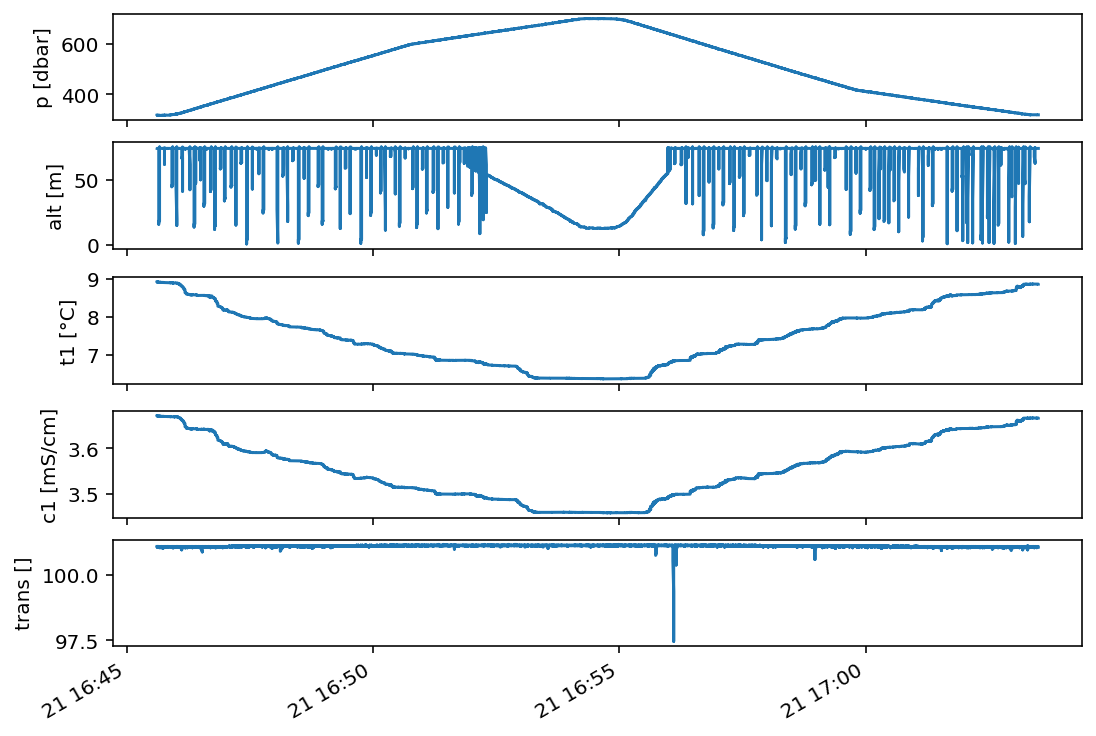

In [30]:
plot_vars = ["p", "alt", "t1", "c1", "trans"]
fig, ax = plt.subplots(
    nrows=len(plot_vars),
    ncols=1,
    figsize=(7.5, 5),
    constrained_layout=True,
    sharex=True,
)
for axi, vi in zip(ax, plot_vars):

    cx[vi].plot(ax=axi)
    axi.set(ylabel="{:s} [{:s}]".format(vi, cx[vi].attrs["units"]), xlabel="")

Plot location data.

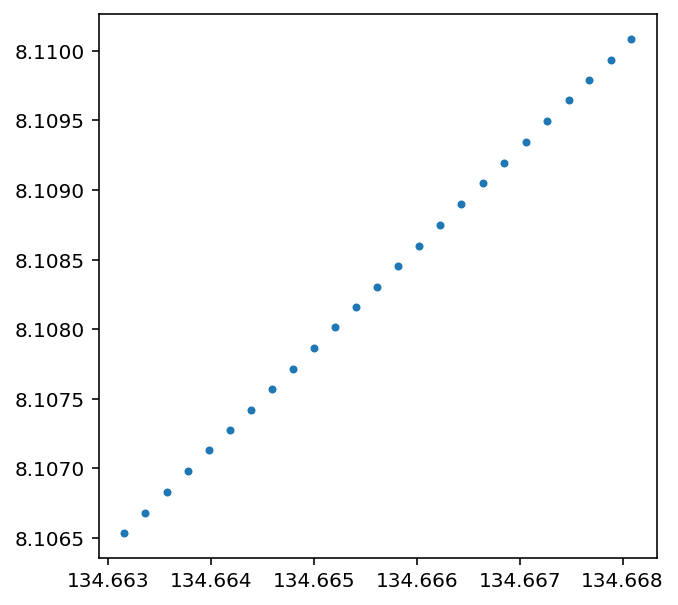

In [31]:
cxc = cx.coarsen(time=1000, boundary='trim').mean()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(cxc.lon, cxc.lat, marker='.', linestyle='');

Save

In [32]:
cx.to_netcdf('fleat16_cast130_ts_test.nc')

Run further processing steps on the time series.

In [33]:
datad, datau = ctd.proc.run_all(cx)

1: tau = 0.0425s, lag = 0.0040s
2: tau = 0.0289s, lag = -0.0116s
1: tau = 0.0489s, lag = 0.0031s
2: tau = 0.0366s, lag = -0.0125s


Depth binning.

In [34]:
dz = 1
zmin = 10
zmax = np.ceil(datad.depth.max().data)
datad = ctd.proc.ctd_bincast(datad, dz, zmin, zmax)
datau = ctd.proc.ctd_bincast(datau, dz, zmin, zmax)

Final data structure.

In [35]:
datad

<xarray.Dataset>
Dimensions:  (z: 680)
Coordinates:
    depth    (z) float64 10.0 11.0 12.0 13.0 14.0 ... 686.0 687.0 688.0 689.0
    lon      (z) float64 nan nan nan nan nan nan ... 134.7 134.7 134.7 134.7 nan
    lat      (z) float64 nan nan nan nan nan nan ... 8.108 8.108 8.108 8.108 nan
    time     (z) datetime64[ns] NaT NaT ... 2016-06-21T16:54:02.600000400 NaT
Dimensions without coordinates: z
Data variables:
    t1       (z) float64 nan nan nan nan nan nan ... 6.382 6.381 6.38 6.381 nan
    t2       (z) float64 nan nan nan nan nan nan ... 6.384 6.383 6.381 6.381 nan
    c1       (z) float64 nan nan nan nan nan nan ... 3.46 3.46 3.46 3.46 nan
    c2       (z) float64 nan nan nan nan nan nan ... 3.461 3.461 3.461 3.461 nan
    p        (z) float64 nan nan nan nan nan nan ... 690.0 691.0 692.0 693.0 nan
    trans    (z) float64 nan nan nan nan nan nan ... 101.1 101.1 101.1 101.1 nan
    alt      (z) float64 nan nan nan nan nan nan ... 19.69 18.87 18.03 17.6 nan
    SA1      (z) float64 nan nan nan nan nan nan ... 34.7 34.7 34.7 34.7 nan
    SA2      (z) float64 nan nan nan nan nan nan ... 34.7 34.7 34.7 34.7 nan
    s1       (z) float64 nan nan nan nan nan nan ... 34.53 34.53 34.53 34.53 nan
    s2       (z) float64 nan nan nan nan nan nan ... 34.53 34.53 34.53 34.53 nan
    CT1      (z) float64 nan nan nan nan nan nan ... 6.32 6.319 6.318 6.318 nan
    CT2      (z) float64 nan nan nan nan nan nan ... 6.321 6.321 6.319 6.319 nan
    th1      (z) float64 nan nan nan nan nan nan ... 6.319 6.318 6.317 6.317 nan
    th2      (z) float64 nan nan nan nan nan nan ... 6.32 6.32 6.318 6.318 nan
    sg1      (z) float64 nan nan nan nan nan nan ... 27.14 27.14 27.14 27.14 nan
    sg2      (z) float64 nan nan nan nan nan nan ... 27.15 27.15 27.15 27.15 nan
Attributes:
    tau1:     0.04252028211881657
    tau2:     0.028874836940116583
    L1:       0.004005809305980776
    L2:       -0.011605198633548402

Plot potential density anomaly profile and its difference between the two sensors.

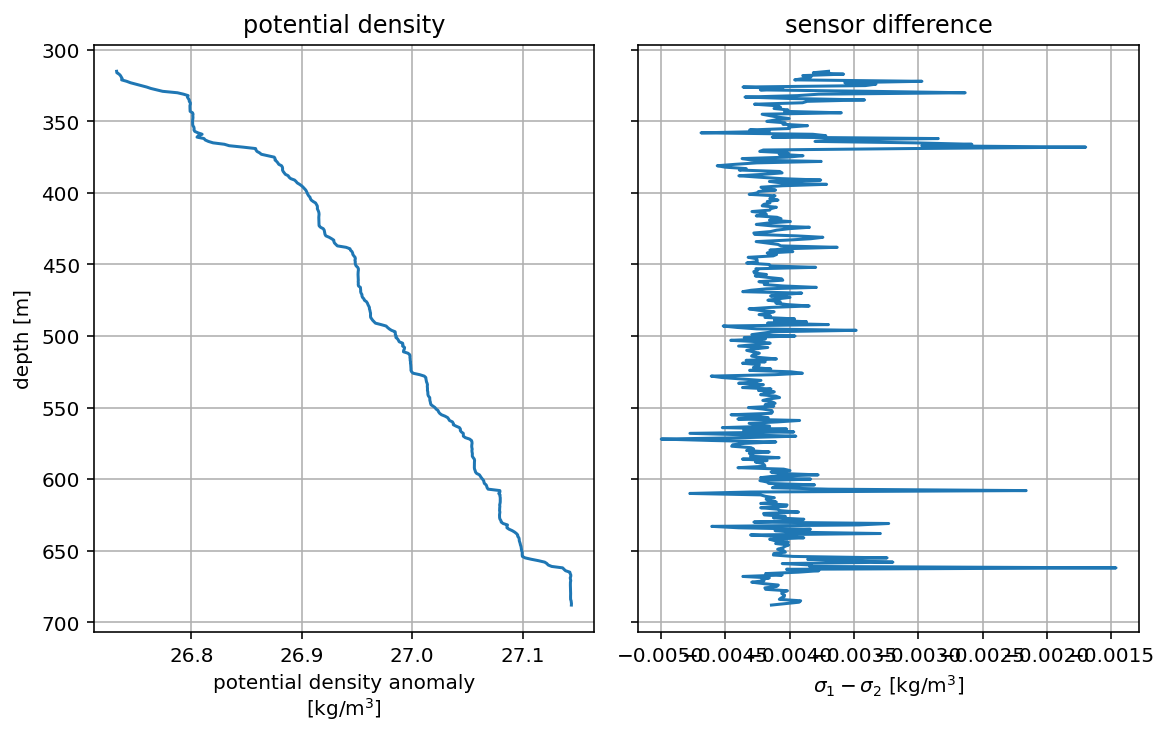

In [36]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(8, 5), constrained_layout=True, sharey=True
)
datad.sg1.plot(y="depth", yincrease=False, ax=ax[0])
ax[0].set(title="potential density")
(datad.sg1 - datad.sg2).plot(y="depth", yincrease=False, ax=ax[1])
ax[1].set(title="sensor difference", ylabel="", xlabel="$\sigma_1-\sigma_2$ [kg/m$^3$]")
for axi in ax:
    axi.grid(True)

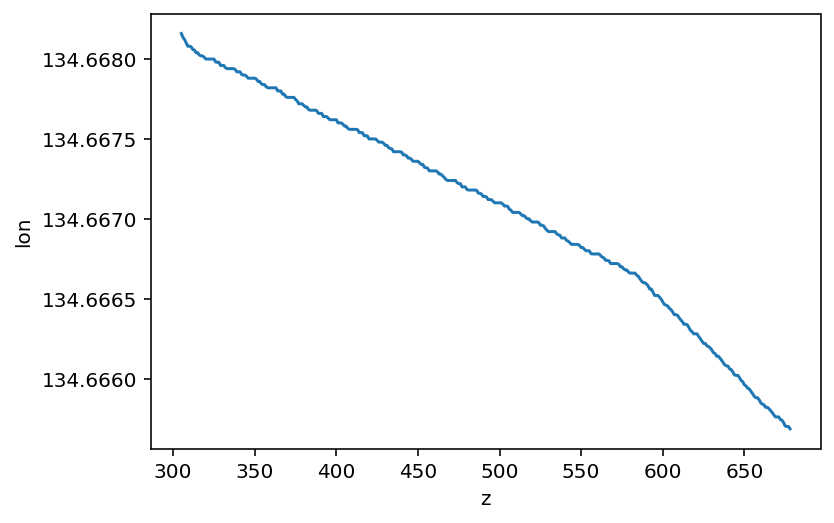

In [37]:
datad.lon.plot()

In [38]:
datad.lon.size

680

In [39]:
datad.to_netcdf('fleat16_cast130_test.nc', mode='w')

In [40]:
ls -ltr

total 19376
-rw-r--r--  1 gunnar  staff   268608 Apr 17 21:07 ctdproc_example.ipynb
-rw-r--r--  1 gunnar  staff  5772052 Apr 17 22:54 fleat16_cast5_ts_test.nc
-rw-r--r--  1 gunnar  staff   208024 Apr 17 22:55 fleat16_cast5_test.nc
-rw-r--r--  1 gunnar  staff   406026 Apr 17 23:09 ctdproc_test_fleat_cast5.ipynb
-rw-r--r--  1 gunnar  staff  2166268 Apr 17 23:12 fleat16_cast130_ts_test.nc
-rw-r--r--  1 gunnar  staff   339529 Apr 17 23:14 ctdproc_test_fleat.ipynb
-rw-r--r--  1 gunnar  staff   118304 Apr 17 23:14 fleat16_cast130_test.nc
